# Descriptive analysis

In [1]:
# Import the packages we need for this dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get the data
filename="cleaned_marijuana_data.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,0.0,4.0,1.0,30.0,2.0
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0


In [3]:
df_kid = df[df.AGE < 20]
df_kid.shape

(261, 21)

In [101]:
min_education = df_kid['EDUCATION_KID'].min()
max_education = df_kid['EDUCATION_KID'].max()
min_education, max_education

(9.0, 66.0)

In [93]:
education_labels = ['9th grade','10th grade','11th grade','12th grade, no diploma','High school graduate','GED or equivalent','More than high school','Less than 9th grade']

In [78]:
gender_labels = ['Male','Female']

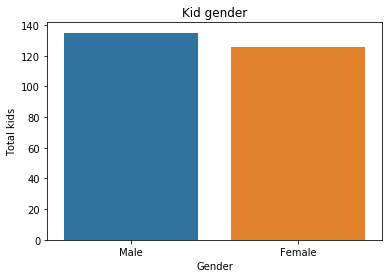

In [102]:
sns.countplot(x='GENDER', data=df_kid)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Kid gender')
ax.set_ylabel('Total kids')
ax.set_xlabel('Gender')
ax.set_xticklabels(('Male', 'Female'));

Although there are more male kids than female kids, the difference between male and female kids are not much.

In [97]:
age_labels = ['18','19']

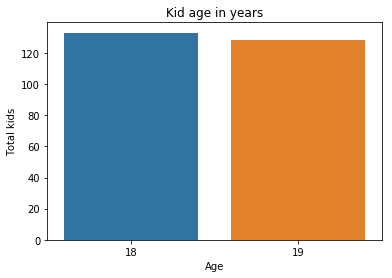

In [98]:
sns.countplot(x='AGE', data=df_kid)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Kid age in years')
ax.set_ylabel('Total kids')
ax.set_xlabel('Age')
ax.set_xticklabels(age_labels);

The kids in this dataset has age = 18 or 19 and they are distributed equally between two ages.

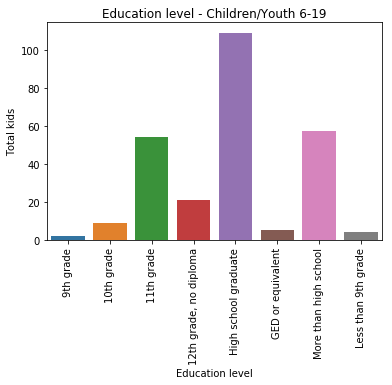

In [96]:
sns.countplot(x='EDUCATION_KID', data=df_kid)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Education level - Children/Youth 6-19')
ax.set_ylabel('Total kids')
ax.set_xlabel('Education level')
ax.set_xticklabels(education_labels,rotation='vertical');

The kids in this dataset have education level from less than 9th grade to More than high school.
The majority of kids have education in High school graduate, More than high school, or 11th grade.

In [103]:
amount_labels = ['1','2','3','4']

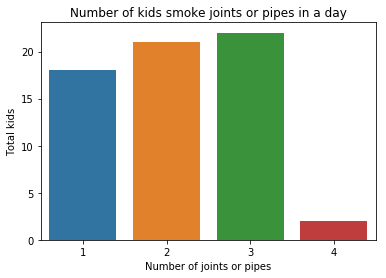

In [104]:
sns.countplot(x='AMOUNT', data=df_kid)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Number of kids smoke joints or pipes in a day')
ax.set_ylabel('Total kids')
ax.set_xlabel('Number of joints or pipes')
ax.set_xticklabels(amount_labels);

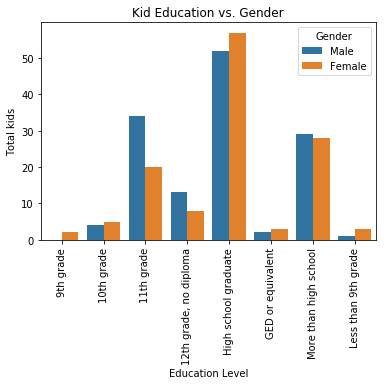

In [112]:
# generate grouped barplot by specifying hue
sns.countplot(x='EDUCATION_KID', hue = 'GENDER', 
              data=df_kid)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Kid Education vs. Gender')
ax.set_ylabel('Total kids')
ax.set_xlabel('Education Level')
ax.legend(gender_labels, title='Gender', loc='best')
ax.set_xticklabels(education_labels,rotation='vertical');

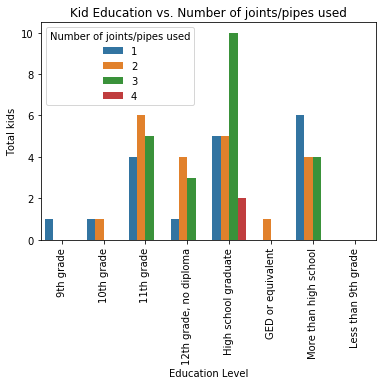

In [113]:
# generate grouped barplot by specifying hue
sns.countplot(x='EDUCATION_KID', hue = 'AMOUNT', 
              data=df_kid)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Kid Education vs. Number of joints/pipes used')
ax.set_ylabel('Total kids')
ax.set_xlabel('Education Level')
ax.legend(amount_labels, title='Number of joints/pipes used', loc='best')
ax.set_xticklabels(education_labels,rotation='vertical');

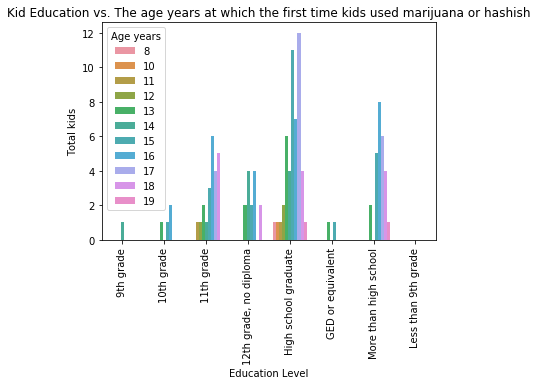

In [114]:
# generate grouped barplot by specifying hue
sns.countplot(x='EDUCATION_KID', hue = 'FIRST_USAGE', 
              data=df_kid)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Kid Education vs. The age years at which the first time kids used marijuana or hashish')
ax.set_ylabel('Total kids')
ax.set_xlabel('Education Level')
ax.legend(firstusage_labels, title='Age years', loc='best')
ax.set_xticklabels(education_labels,rotation='vertical');

In [52]:
import patsy
import statsmodels.api as sm
x = df_kid['EDUCATION_KID']
y = df_kid['AMOUNT']
np.corrcoef(x, y)

array([[ 1., nan],
       [nan, nan]])

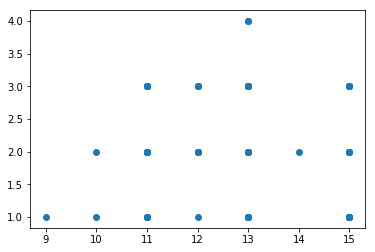

In [55]:
plt.scatter(x, y);

In [56]:

outcome, predictors = patsy.dmatrices('y ~ x')
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                   0.01691
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.897
Time:                        09:17:33   Log-Likelihood:                -80.145
No. Observations:                  63   AIC:                             164.3
Df Residuals:                      61   BIC:                             168.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0099      0.907      2.216      0.0

In [59]:
df_kid.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,PER_YEAR,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
6,83743.0,1.0,18.0,11.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14,83759.0,2.0,19.0,15.0,NaN,NaN,NaN,7.0,1.74,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
46,83836.0,2.0,18.0,9.0,NaN,NaN,NaN,14.0,2.76,6.0,...,1.0,14.0,5.0,1.0,14.0,1.0,1.0,1.0,30.0,1.0
50,83847.0,1.0,18.0,10.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
57,83862.0,2.0,19.0,15.0,NaN,NaN,NaN,9999.0,NaN,4.0,...,1.0,15.0,1.0,1.0,17.0,8.0,2.0,8.0,NaN,0.0


In [108]:
firstusage_labels = ['8','10','11','12','13','14','15','16','17','18','19']

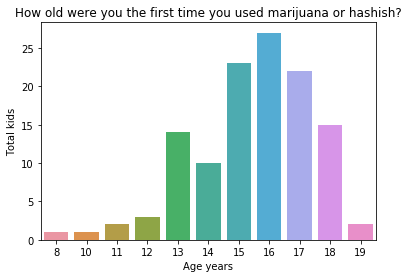

In [110]:
sns.countplot(x='FIRST_USAGE', data=df_kid)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('How old were you the first time you used marijuana or hashish?')
ax.set_ylabel('Total kids')
ax.set_xlabel('Age years')
ax.set_xticklabels(firstusage_labels,rotation='horizontal');

In [65]:
y = df_kid['EDUCATION_KID']
x = df_kid['FIRST_USAGE']
np.corrcoef(x, y)

array([[nan, nan],
       [nan,  1.]])

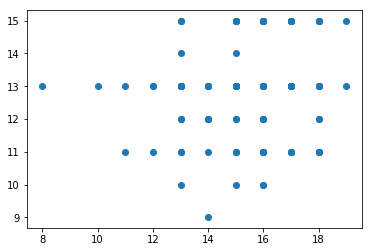

In [66]:
plt.scatter(x, y);

In [61]:
outcome, predictors = patsy.dmatrices('y ~ x')
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.659
Date:                Wed, 05 Jun 2019   Prob (F-statistic):              0.200
Time:                        09:20:40   Log-Likelihood:                -249.26
No. Observations:                 120   AIC:                             502.5
Df Residuals:                     118   BIC:                             508.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4808      1.558      8.650      0.0